<H>5.1<H>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def load_data(filename):
  """Loads data from a CSV file and splits it into features and target."""
  data = pd.read_csv(filename)
  X = data['Height'].values.reshape(-1, 1)  # Reshape for sklearn
  y = data['Weight'].values
  return X, y

# Load data
X, y = load_data('HeightWeight.csv')


In [14]:
def ridge_regression_and_plot(X, y, lambdas):
  plt.figure(figsize=(10, 6))

  for lambda_ in enumerate(lambdas):
    ridge_model = Ridge(alpha=lambda_)
    ridge_model.fit(X, y)
    y_pred = ridge_model.predict(X)

    plt.plot(X, y_pred, label=f'lambda={lambda_}')
    print(f"Slope for lambda={lambda_}: {ridge_model.coef_[0]}")

  plt.scatter(X, y, color='black', label='Data')
  plt.xlabel('Height')
  plt.ylabel('Weight')
  plt.legend()
  plt.title('Ridge Regression Models')
  plt.show()

Slope for lambda=100: 1.3780052819518878
Slope for lambda=100000000: 0.0130363580588361
Slope for lambda=1000000: 0.673201234065182
Slope for lambda=100000000: 0.0130363580588361


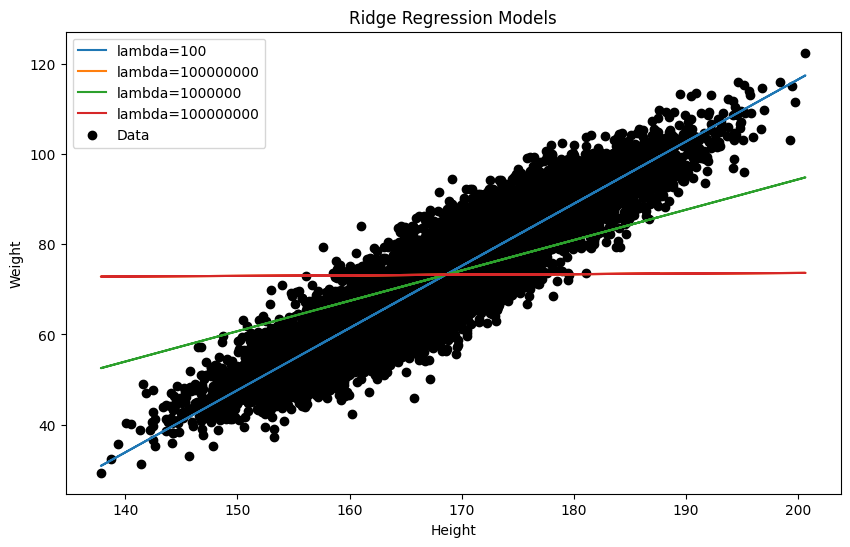

In [30]:
def main():
  filename = 'HeightWeight.csv'
  X, y = load_data(filename)
  lambdas = [10**2, 10**4, 10**6, 10**8]  # Adjust lambda values as needed
  ridge_regression_and_plot(X, y, lambdas)

if __name__ == '__main__':
  main()


import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge

# Generate sine wave data
num_points = 100
x = np.linspace(0, 10, num_points)
y = (x) + np.random.randn(num_points) * 0.9  # Add some noise

alpha = [10, 100, 1000, 10000]
for i in alpha:
  # Define the linear model with Ridge regression
  model = Ridge(alpha=i)  # Adjust alpha for regularization strength
  model.fit(x[:, np.newaxis], y)

  # Predict using the model
  y_pred = model.predict(x[:, np.newaxis])

  # Plot the data and the linear model
  plt.plot(x, y_pred, label=f'lamda: {i}')

plt.plot(x, y, 'o', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Sine Wave Data with Linear Model (Ridge Regression)')
plt.legend()
plt.grid(True)
plt.show()

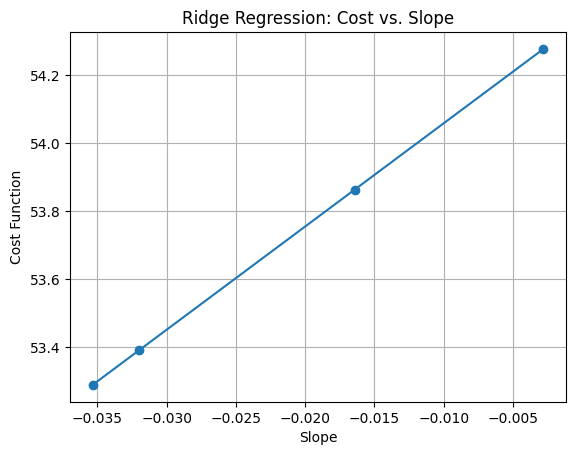

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge

def plot_cost_vs_slope(x, y, alphas):

  slopes = []
  costs = []

  for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(x[:, np.newaxis], y)
    slopes.append(model.coef_[0])

    # Calculate the cost function (sum of squared residuals + alpha * slope^2)
    y_pred = model.predict(x[:, np.newaxis])
    residuals = y - y_pred
    squared_residuals = residuals**2
    cost = np.sum(squared_residuals) + alpha * (model.coef_[0]**2)
    costs.append(cost)

  plt.plot(slopes, costs, marker='o')
  plt.xlabel("Slope")
  plt.ylabel("Cost Function")
  plt.title("Ridge Regression: Cost vs. Slope")
  plt.grid(True)
  plt.show()

# Example usage
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.randn(100) * 0.2
alphas = [10, 100, 1000, 10000]

plot_cost_vs_slope(x, y, alphas)


<H>5.2<H>

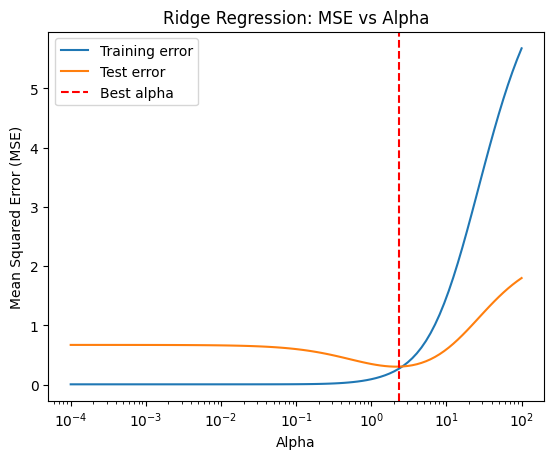

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# Sample data (replace with your data)
data = {'X1': [1, 2, 3, 4, 5],
        'X2': [2, 4, 5, 4, 5],
        'y': [7, 10, 13, 12, 14]}
df = pd.DataFrame(data)

# Split data into features (X) and target variable (y)
X = df[['X1', 'X2']]
y = df['y']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Range of alpha values to explore
alpha_values = np.logspace(-4, 2, 100)

# Initialize lists to store SSR values
train_error = []
test_error = []

# Loop through alpha values
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Calculate mean squared error (MSE) on training and test sets
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_error.append(mean_squared_error(y_train, train_pred))
    test_error.append(mean_squared_error(y_test, test_pred))

# Find the index of the minimum test error
best_alpha_index = np.argmin(test_error)

# Plot the SSR curve
plt.plot(alpha_values, train_error, label='Training error')
plt.plot(alpha_values, test_error, label='Test error')
plt.axvline(x=alpha_values[best_alpha_index], color='red', linestyle='--', label='Best alpha')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Ridge Regression: MSE vs Alpha')
plt.legend()
plt.show()


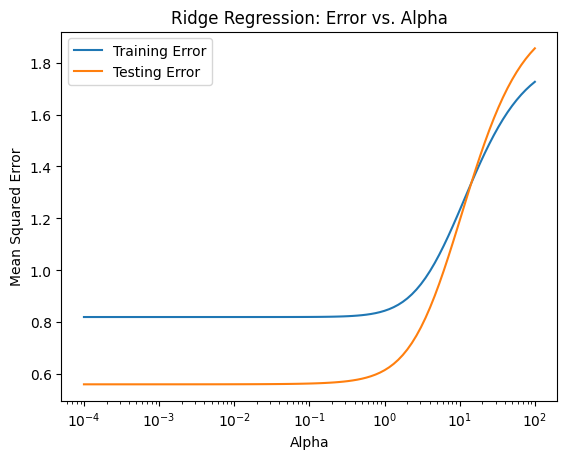

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# สร้างข้อมูลตัวอย่าง
np.random.seed(42)
X = np.random.rand(100, 10)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.randn(100)

# แบ่งข้อมูลออกเป็น training set และ testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# กำหนดช่วงของค่า alpha
alpha_values = np.logspace(-4, 2, 100)

# สร้าง list เพื่อเก็บค่า error
train_error = []
test_error = []

# ทำการ fit model สำหรับแต่ละค่า alpha และคำนวณ error
for alpha in alpha_values:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_error.append(mean_squared_error(y_train, y_train_pred))
    test_error.append(mean_squared_error(y_test, y_test_pred))

# Plot กราฟ
plt.plot(alpha_values, train_error, label='Training Error')
plt.plot(alpha_values, test_error, label='Testing Error')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error')
plt.title('Ridge Regression: Error vs. Alpha')
plt.legend()
plt.show()
